In [1]:
#Necessary imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score)

In [2]:
#load the cleaned CSV
df = pd.read_csv('../data/noshowappointments_cleaned.csv')
df.head()

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,days_until_appointment,neighbourhood_freq
0,1,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,0,1,0,0,0,0,0,1,592
1,1,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,0,0,0,0,0,0,1,1,533
2,1,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,0,0,0,0,0,0,1,1,533
3,1,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,0,0,0,0,0,0,0,1,472
4,1,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,0,0,0,0,0,0,0,1,1186


In [3]:
df = df.drop(columns =['scheduledday','appointmentday'])

In [4]:
#target variable
y = df['no_show']

#Feature set
X = df.drop(columns =['no_show'], errors='ignore')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")
print("Target Distribution (Train):")
print(y_train.value_counts(normalize=True))

Train shape: (57567, 10)
Test shape: (14392, 10)
Target Distribution (Train):
no_show
0    0.714802
1    0.285198
Name: proportion, dtype: float64


In [5]:
# Initialize and train
baseline = LogisticRegression(max_iter=1000, solver='liblinear')  # liblinear is better for small/medium datasets
baseline.fit(X_train, y_train)

# Predict on test set
y_pred = baseline.predict(X_test)
y_proba = baseline.predict_proba(X_test)[:, 1]  # for roc-auc

In [6]:
#Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[10270    18]
 [ 4090    14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.83     10288
           1       0.44      0.00      0.01      4104

    accuracy                           0.71     14392
   macro avg       0.58      0.50      0.42     14392
weighted avg       0.64      0.71      0.60     14392



In [7]:
auc = roc_auc_score(y_test, y_proba)
print(f"\nROC-AUC Score: {auc:.4f}")



ROC-AUC Score: 0.5765


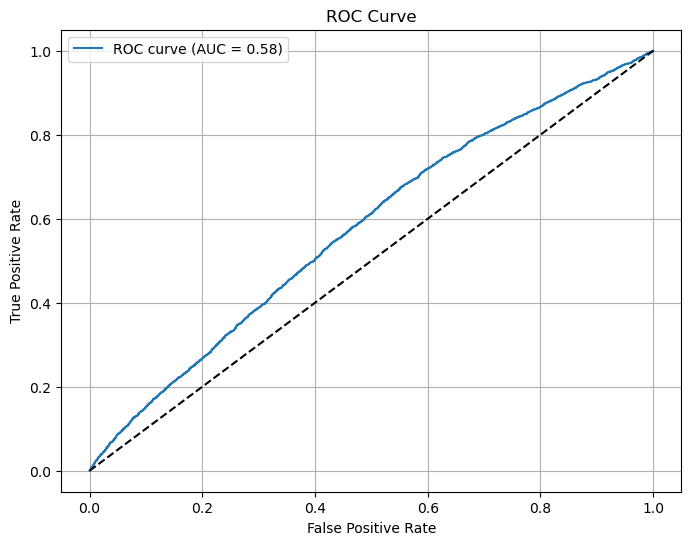

In [8]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


Confusion Matrix:
[[5547 4741]
 [1759 2345]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.54      0.63     10288
           1       0.33      0.57      0.42      4104

    accuracy                           0.55     14392
   macro avg       0.55      0.56      0.52     14392
weighted avg       0.64      0.55      0.57     14392


ROC-AUC Score: 0.5786


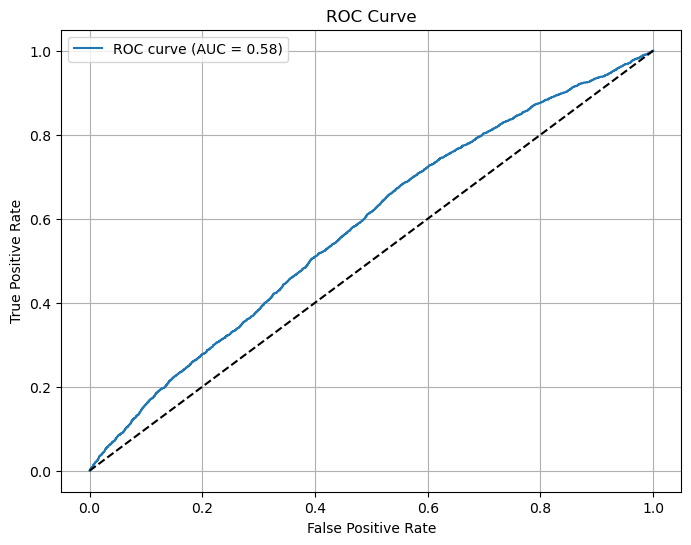

In [9]:
# Initialize and train
baseline2 = LogisticRegression(max_iter=1000, class_weight='balanced')  # liblinear is better for small/medium datasets
baseline2.fit(X_train, y_train)

# Predict on test set
y_pred = baseline2.predict(X_test)
y_proba = baseline2.predict_proba(X_test)[:, 1]  

#Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

auc = roc_auc_score(y_test, y_proba)
print(f"\nROC-AUC Score: {auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

Logistic Regression – Baseline Summary

 Model:
- Algorithm: Logistic Regression
- Settings:
  - Solver: `'liblinear'`
  - Max Iterations: `10000`
  - Class Weight: `'balanced'`



Evaluation:

- Accuracy: ~55%
- Precision (No-Show): 0.33
- Recall (No-Show): 0.57 
- F1-Score (No-Show): 0.42
- ROC-AUC Score: 0.58


Explanation:

- Applying `class_weight='balanced'` helped the model detect no-shows much better, increasing recall from `0.00` to `0.57`
- This is a trade-off — we accept more false positives in return for catching actual missed appointments
- The ROC-AUC shows weak but non-random classification — a reasonable baseline



In [10]:
import joblib

# Save the trained model
joblib.dump(baseline2, '../models/logreg_baseline.pkl')

['../models/logreg_baseline.pkl']

In [11]:
#Lets try some other models
#Random forest
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

ROC-AUC Score: 0.5763

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.84      0.78     10288
           1       0.37      0.24      0.29      4104

    accuracy                           0.67     14392
   macro avg       0.55      0.54      0.54     14392
weighted avg       0.63      0.67      0.64     14392


Confusion Matrix:
 [[8656 1632]
 [3137  967]]


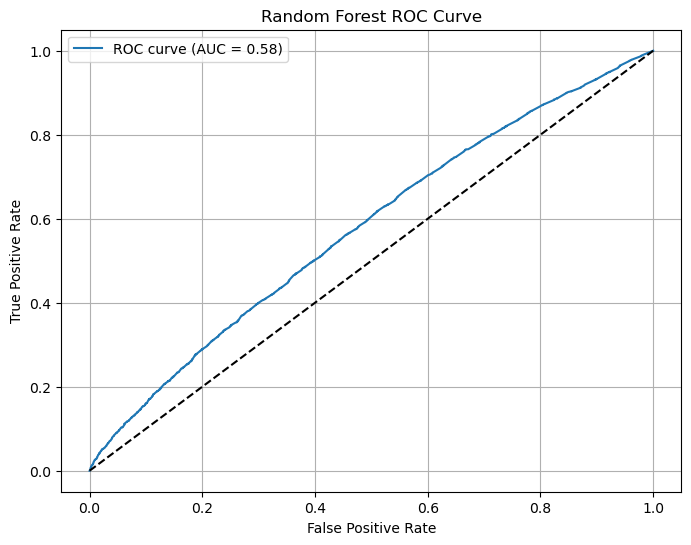

In [12]:
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

# ROC-AUC Score
roc_score = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", round(roc_score, 4))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc_score_val = auc(fpr, tpr) 

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_score_val:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.grid()
plt.show()

In [13]:
#tuned version (manually)
rf2 = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_leaf=4,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf2.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=4, n_estimators=200, n_jobs=-1,
                       random_state=42)

ROC-AUC Score: 0.6038

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.61      0.68     10288
           1       0.36      0.54      0.43      4104

    accuracy                           0.59     14392
   macro avg       0.56      0.58      0.56     14392
weighted avg       0.65      0.59      0.61     14392


Confusion Matrix:
 [[6294 3994]
 [1885 2219]]


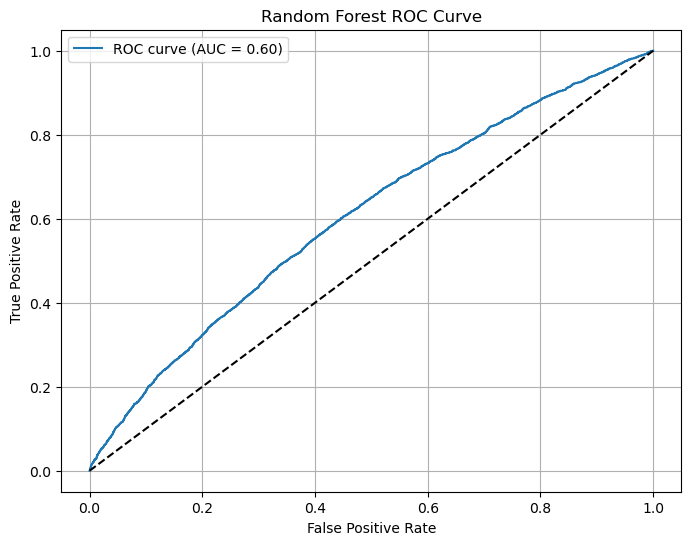

In [14]:
y2_pred = rf2.predict(X_test)
y2_proba = rf2.predict_proba(X_test)[:, 1]

# ROC-AUC Score
roc_score = roc_auc_score(y_test, y2_proba)
print("ROC-AUC Score:", round(roc_score, 4))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y2_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y2_pred))

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y2_proba)
roc_auc_score_val = auc(fpr, tpr) 

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_score_val:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.grid()
plt.show()

TRAIN SET EVALUATION
ROC-AUC (Train): 0.8068

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.86      0.74      0.79     41149
           1       0.52      0.71      0.60     16418

    accuracy                           0.73     57567
   macro avg       0.69      0.72      0.69     57567
weighted avg       0.76      0.73      0.74     57567


Confusion Matrix (Train):
 [[30275 10874]
 [ 4839 11579]]

TEST SET EVALUATION
ROC-AUC (Test): 0.6067

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.76      0.67      0.71     10288
           1       0.37      0.48      0.42      4104

    accuracy                           0.61     14392
   macro avg       0.57      0.58      0.56     14392
weighted avg       0.65      0.61      0.63     14392


Confusion Matrix (Test):
 [[6861 3427]
 [2117 1987]]


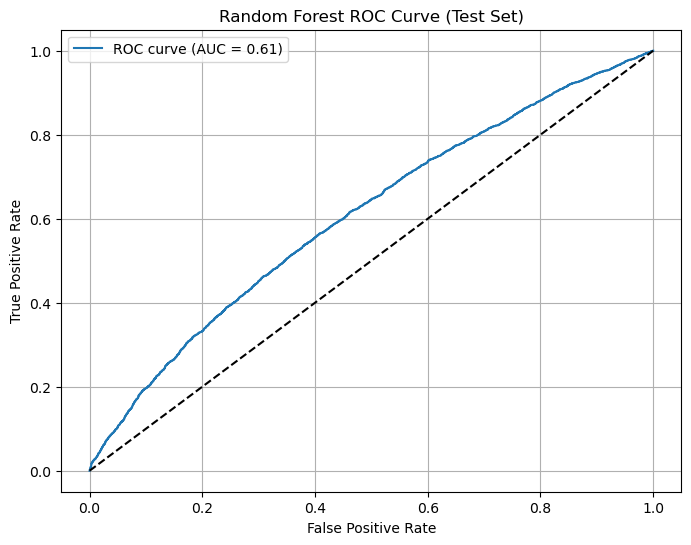

In [15]:
#Another one 
rf3 = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_leaf=3,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf3.fit(X_train,y_train)

# train set
print("TRAIN SET EVALUATION")

train_pred = rf3.predict(X_train)
train_proba = rf3.predict_proba(X_train)[:, 1]

print("ROC-AUC (Train):", round(roc_auc_score(y_train, train_proba), 4))
print("\nClassification Report (Train):\n", classification_report(y_train, train_pred))
print("\nConfusion Matrix (Train):\n", confusion_matrix(y_train, train_pred))

#test set
print("\nTEST SET EVALUATION")

test_pred = rf3.predict(X_test)
test_proba = rf3.predict_proba(X_test)[:, 1]

print("ROC-AUC (Test):", round(roc_auc_score(y_test, test_proba), 4))
print("\nClassification Report (Test):\n", classification_report(y_test, test_pred))
print("\nConfusion Matrix (Test):\n", confusion_matrix(y_test, test_pred))

# roc test 
fpr, tpr, thresholds = roc_curve(y_test, test_proba)
roc_auc_val = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_val:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve (Test Set)')
plt.legend()
plt.grid()
plt.show()


### But overfitting, lest try Grid search

Starting Grid Search...
Fitting 3 folds for each of 18 candidates, totalling 54 fits

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 6, 'n_estimators': 500}
Best CV ROC-AUC Score: 0.6096

TRAIN SET EVALUATION
ROC-AUC (Train): 0.6695
Classification Report (Train):
               precision    recall  f1-score   support

           0       0.80      0.63      0.71     41149
           1       0.40      0.61      0.48     16418

    accuracy                           0.63     57567
   macro avg       0.60      0.62      0.60     57567
weighted avg       0.69      0.63      0.64     57567

Confusion Matrix (Train):
 [[25965 15184]
 [ 6336 10082]]

TEST SET EVALUATION
ROC-AUC (Test): 0.6045
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.77      0.60      0.68     10288
           1       0.35      0.55      0.43      4104

    accuracy                           0.59     14392
   macro avg       0.56      0.57      0.55     1

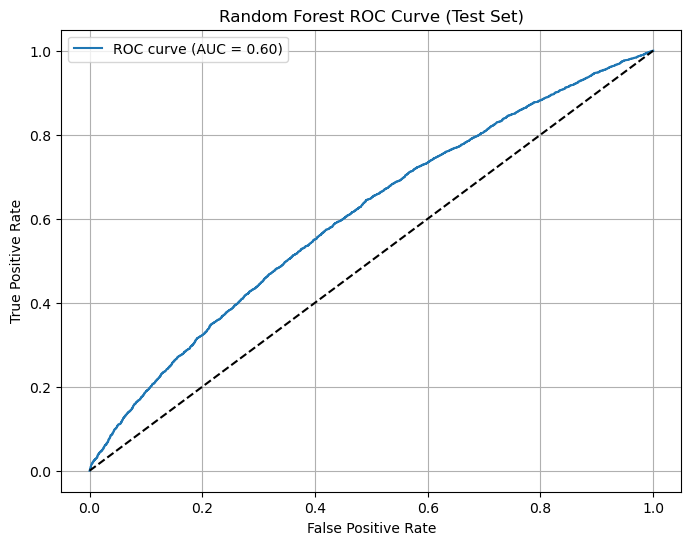

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [6, 10, 14],
    'min_samples_leaf': [2, 6]
}

#base RandomForestClassifier
rf_base = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

#Run GridSearchCV
grid = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1
)

print("Starting Grid Search...")
grid.fit(X_train, y_train)
best_rf = grid.best_estimator_

print(f"\nBest Parameters: {grid.best_params_}")
print(f"Best CV ROC-AUC Score: {grid.best_score_:.4f}")


#Train Set Evaluation
print("\nTRAIN SET EVALUATION")

train_pred = best_rf.predict(X_train)
train_proba = best_rf.predict_proba(X_train)[:, 1]

print("ROC-AUC (Train):", round(roc_auc_score(y_train, train_proba), 4))
print("Classification Report (Train):\n", classification_report(y_train, train_pred))
print("Confusion Matrix (Train):\n", confusion_matrix(y_train, train_pred))

#Test Set Evaluation
print("\nTEST SET EVALUATION")

test_pred = best_rf.predict(X_test)
test_proba = best_rf.predict_proba(X_test)[:, 1]

print("ROC-AUC (Test):", round(roc_auc_score(y_test, test_proba), 4))
print("Classification Report (Test):\n", classification_report(y_test, test_pred))
print("Confusion Matrix (Test):\n", confusion_matrix(y_test, test_pred))

#ROC Curve for Test Set
fpr, tpr, _ = roc_curve(y_test, test_proba)
roc_auc_val = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_val:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve (Test Set)')
plt.legend()
plt.grid()
plt.show()

In [17]:
#save model
joblib.dump(best_rf, '../models/rf_grid_best.pkl')


['../models/rf_grid_best.pkl']

In [18]:
import json, datetime, pathlib

results = {
    "timestamp": datetime.datetime.now().isoformat(),
    "model": "RandomForest (GridSearchCV)",
    "best_params": grid.best_params_,
    "roc_auc_test": roc_auc_score(y_test, test_proba),
    "recall_test": classification_report(y_test, test_pred, output_dict=True)["1"]["recall"],
    "precision_test": classification_report(y_test, test_pred, output_dict=True)["1"]["precision"],
    "f1_test": classification_report(y_test, test_pred, output_dict=True)["1"]["f1-score"]
}

pathlib.Path("../logs").mkdir(exist_ok=True)

with open("../logs/rf_gridsearch_log.json", "a") as f:
    f.write(json.dumps(results) + "\n")


In [19]:
#lets try something more robust (XGBOOST)
!pip install xgboost

In [20]:
import xgboost as xgb

In [21]:
neg, pos = y_train.value_counts()
scale_pos_weight = neg / pos
print(scale_pos_weight)

2.506334510902668


In [22]:
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=1.8,
    eval_metric='auc',
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb_clf.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=-1, num_parallel_tree=None, ...)

ROC-AUC (Train): 0.7354
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82     41149
           1       0.53      0.43      0.47     16418

    accuracy                           0.73     57567
   macro avg       0.66      0.64      0.65     57567
weighted avg       0.72      0.73      0.72     57567

Confusion Matrix:
 [[35024  6125]
 [ 9429  6989]]

ROC-AUC (Test): 0.6123
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78     10288
           1       0.41      0.32      0.36      4104

    accuracy                           0.67     14392
   macro avg       0.58      0.57      0.57     14392
weighted avg       0.65      0.67      0.66     14392

Confusion Matrix:
 [[8384 1904]
 [2800 1304]]


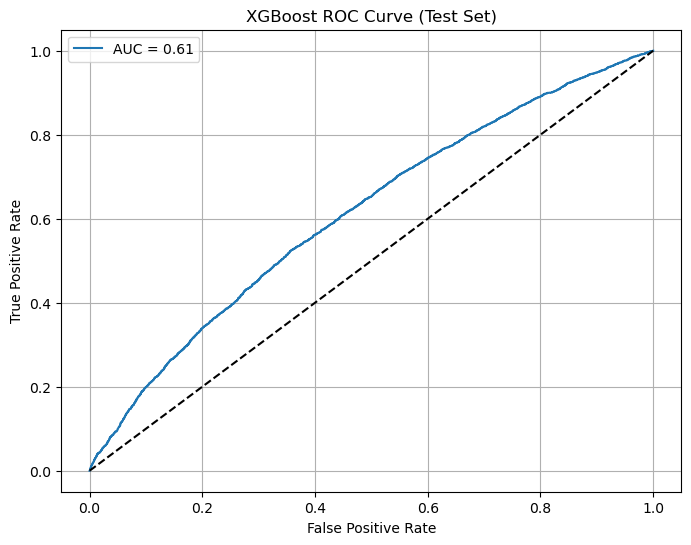

In [23]:
# Train Evaluation
train_pred = xgb_clf.predict(X_train)
train_proba = xgb_clf.predict_proba(X_train)[:, 1]

print("ROC-AUC (Train):", round(roc_auc_score(y_train, train_proba), 4))
print("Classification Report:\n", classification_report(y_train, train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, train_pred))

# Test Evaluation
test_pred = xgb_clf.predict(X_test)
test_proba = xgb_clf.predict_proba(X_test)[:, 1]

print("\nROC-AUC (Test):", round(roc_auc_score(y_test, test_proba), 4))
print("Classification Report:\n", classification_report(y_test, test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_pred))

# ROC Curve (Test Set)
fpr, tpr, _ = roc_curve(y_test, test_proba)
roc_auc_val = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_val:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve (Test Set)')
plt.legend()
plt.grid()
plt.show()


In [24]:
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    random_state=42,
    n_jobs=-1
)


In [25]:
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [4, 6],
    'learning_rate': [0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'scale_pos_weight': [2.5, 2.7, 3.0]  # try class imbalance weights
}


In [26]:
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='roc_auc',   # you can also use 'recall' or 'f1'
    cv=3,                # 3-fold cross-validation
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=No...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8], 'learning_rate': [0.1],
                         'max_depth': [4, 6], 'n_estimators': [100, 300],
                         'scale_pos_weight': [2.5, 2.7, 3.0],
                         'subsample': [0.8]},
             scoring='roc_auc', verbose=2)

In [27]:
print("Best Parameters:", grid_search.best_params_)
print("Best CV ROC-AUC Score:", round(grid_search.best_score_, 4))
best_model = grid_search.best_estimator_


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'scale_pos_weight': 3.0, 'subsample': 0.8}
Best CV ROC-AUC Score: 0.612


In [28]:
# Train Evaluation
train_preds = best_model.predict(X_train)
train_proba = best_model.predict_proba(X_train)[:, 1]
print("ROC-AUC (Train):", round(roc_auc_score(y_train, train_proba), 4))
print("Classification Report (Train):\n", classification_report(y_train, train_preds))
print("Confusion Matrix (Train):\n", confusion_matrix(y_train, train_preds))

# Test Evaluation
test_preds = best_model.predict(X_test)
test_proba = best_model.predict_proba(X_test)[:, 1]
print("\nROC-AUC (Test):", round(roc_auc_score(y_test, test_proba), 4))
print("Classification Report (Test):\n", classification_report(y_test, test_preds))
print("Confusion Matrix (Test):\n", confusion_matrix(y_test, test_preds))


ROC-AUC (Train): 0.6827
Classification Report (Train):
               precision    recall  f1-score   support

           0       0.84      0.48      0.61     41149
           1       0.37      0.76      0.50     16418

    accuracy                           0.56     57567
   macro avg       0.60      0.62      0.56     57567
weighted avg       0.70      0.56      0.58     57567

Confusion Matrix (Train):
 [[19873 21276]
 [ 3895 12523]]

ROC-AUC (Test): 0.6125
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.79      0.45      0.58     10288
           1       0.34      0.70      0.45      4104

    accuracy                           0.52     14392
   macro avg       0.56      0.57      0.51     14392
weighted avg       0.66      0.52      0.54     14392

Confusion Matrix (Test):
 [[4661 5627]
 [1247 2857]]


In [29]:
from scipy.stats import uniform, randint

param_dist = {
    'n_estimators': randint(100, 400),
    'max_depth': randint(4, 10),
    'learning_rate': uniform(0.01, 0.2),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'scale_pos_weight': uniform(1.5, 2.5),  
    'gamma': uniform(0, 5)
}


In [32]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import RandomizedSearchCV

xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    random_state=42,
    n_jobs=-1
)

random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=30,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters: {'colsample_bytree': 0.6405886171464128, 'gamma': 3.317508845540279, 'learning_rate': 0.011012316769243738, 'max_depth': 9, 'min_child_weight': 2, 'n_estimators': 293, 'scale_pos_weight': 3.229737994231733, 'subsample': 0.8607845038010402}


In [33]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Train Set
train_preds = best_model.predict(X_train)
train_proba = best_model.predict_proba(X_train)[:, 1]

print("ROC-AUC (Train):", round(roc_auc_score(y_train, train_proba), 4))
print("Classification Report (Train):\n", classification_report(y_train, train_preds))
print("Confusion Matrix (Train):\n", confusion_matrix(y_train, train_preds))

# Test Set
test_preds = best_model.predict(X_test)
test_proba = best_model.predict_proba(X_test)[:, 1]

print("\nROC-AUC (Test):", round(roc_auc_score(y_test, test_proba), 4))
print("Classification Report (Test):\n", classification_report(y_test, test_preds))
print("Confusion Matrix (Test):\n", confusion_matrix(y_test, test_preds))


ROC-AUC (Train): 0.6947
Classification Report (Train):
               precision    recall  f1-score   support

           0       0.87      0.40      0.54     41149
           1       0.36      0.85      0.50     16418

    accuracy                           0.52     57567
   macro avg       0.61      0.62      0.52     57567
weighted avg       0.72      0.52      0.53     57567

Confusion Matrix (Train):
 [[16315 24834]
 [ 2544 13874]]

ROC-AUC (Test): 0.6136
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.80      0.36      0.50     10288
           1       0.33      0.78      0.46      4104

    accuracy                           0.48     14392
   macro avg       0.56      0.57      0.48     14392
weighted avg       0.67      0.48      0.49     14392

Confusion Matrix (Test):
 [[3734 6554]
 [ 919 3185]]
[CV] END ..max_depth=6, min_samples_leaf=2, n_estimators=500; total time=   7.3s
[CV] END .max_depth=10, min_samples_leaf=2,

In [35]:
# Save model
joblib.dump(best_model, '../models/mxgboost_noshow_model.pkl')

['../models/mxgboost_noshow_model.pkl']

In [38]:
results = {
    "timestamp": datetime.datetime.now().isoformat(),
    "model": "XGBoost (RandomizedSearchCV)",
    "best_params": random_search.best_params_,
    "roc_auc_test": roc_auc_score(y_test, test_proba),
    "recall_test": classification_report(y_test, test_preds, output_dict=True)["1"]["recall"],
    "precision_test": classification_report(y_test, test_preds, output_dict=True)["1"]["precision"],
    "f1_test": classification_report(y_test, test_preds, output_dict=True)["1"]["f1-score"]
}

# Save to log file
with open("../logs/xgb_randomsearch_log.json", "a") as f:
    f.write(json.dumps(results) + "\n")